In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder , LabelEncoder , OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.metrics import accuracy_score , precision_score , recall_score , classification_report , ConfusionMatrixDisplay , confusion_matrix
from sklearn.metrics import mean_squared_error , f1_score 

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df = df.rename(columns={"exng":"Excercise" , "cp": "Chest_Pain" , "trtbps":"Blood_Pressure" , "chol":"Cholestrol" , "fbs":"Blood_Sugar" , "rest_ecg":"ECG_Report" , "thalachh":"Max_Heart_Rate"})
df

,age,sex,Chest_Pain,Blood_Pressure,Cholestrol,Blood_Sugar,restecg,Max_Heart_Rate,Excercise,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape

(303, 14)

In [5]:
df.columns

Index(['age', 'sex', 'Chest_Pain', 'Blood_Pressure', 'Cholestrol',
       'Blood_Sugar', 'restecg', 'Max_Heart_Rate', 'Excercise', 'oldpeak',
       'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex             303 non-null    int64  
 2   Chest_Pain      303 non-null    int64  
 3   Blood_Pressure  303 non-null    int64  
 4   Cholestrol      303 non-null    int64  
 5   Blood_Sugar     303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   Max_Heart_Rate  303 non-null    int64  
 8   Excercise       303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  slp             303 non-null    int64  
 11  caa             303 non-null    int64  
 12  thall           303 non-null    int64  
 13  output          303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.dtypes

age                 int64
sex                 int64
Chest_Pain          int64
Blood_Pressure      int64
Cholestrol          int64
Blood_Sugar         int64
restecg             int64
Max_Heart_Rate      int64
Excercise           int64
oldpeak           float64
slp                 int64
caa                 int64
thall               int64
output              int64
dtype: object

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

age               0
sex               0
Chest_Pain        0
Blood_Pressure    0
Cholestrol        0
Blood_Sugar       0
restecg           0
Max_Heart_Rate    0
Excercise         0
oldpeak           0
slp               0
caa               0
thall             0
output            0
dtype: int64

In [12]:
df.corr()

,age,sex,Chest_Pain,Blood_Pressure,Cholestrol,Blood_Sugar,restecg,Max_Heart_Rate,Excercise,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
Chest_Pain,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
Blood_Pressure,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
Cholestrol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
Blood_Sugar,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
Max_Heart_Rate,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
Excercise,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

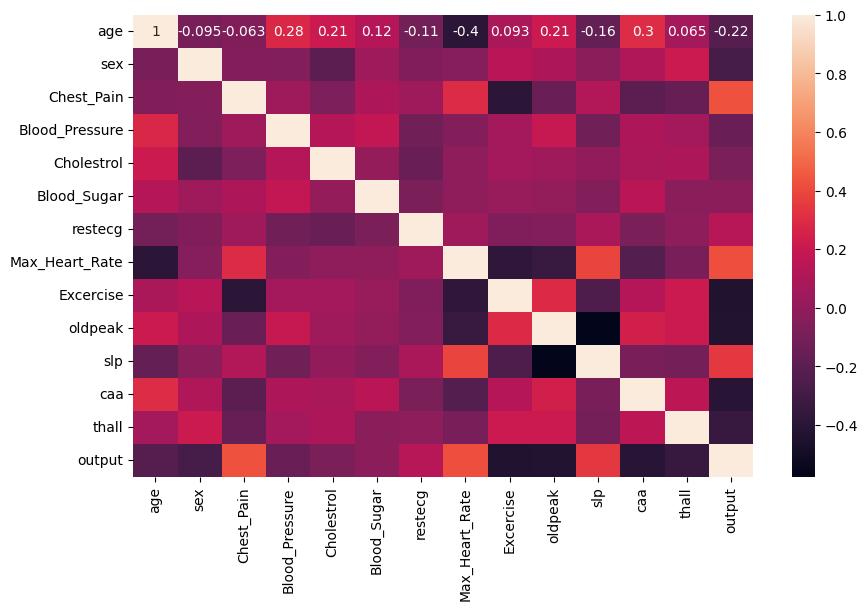

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [14]:
df

,age,sex,Chest_Pain,Blood_Pressure,Cholestrol,Blood_Sugar,restecg,Max_Heart_Rate,Excercise,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
X = df.drop('output' , axis=1)
y = df['output']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=233)

In [57]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [58]:
accuracy_score(y_test , y_pred)

0.8360655737704918

In [59]:
precision_score(y_test , y_pred)

0.7619047619047619

In [60]:
recall_score(y_test , y_pred)

1.0

In [61]:
confusion_matrix(y_test , y_pred)

array([[19, 10],
       [ 0, 32]], dtype=int64)

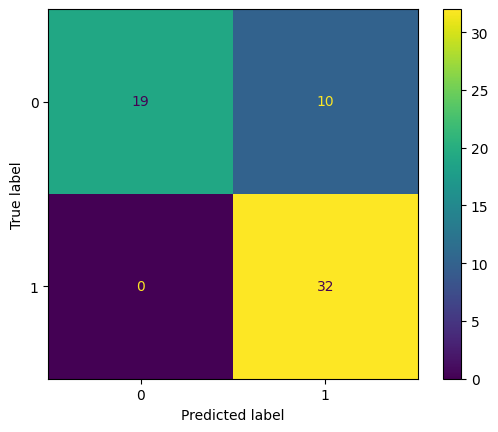

In [62]:
ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred)).plot()
plt.show()

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79        29
           1       0.76      1.00      0.86        32

    accuracy                           0.84        61
   macro avg       0.88      0.83      0.83        61
weighted avg       0.88      0.84      0.83        61



In [64]:
from sklearn import tree

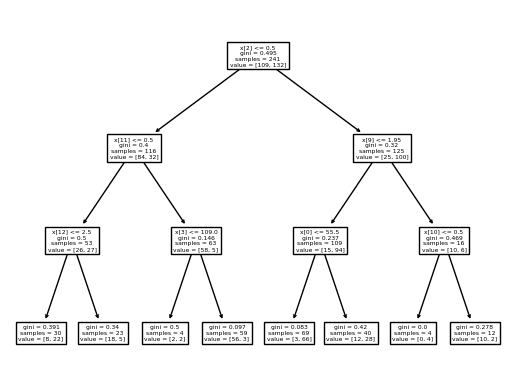

In [65]:
tree.plot_tree(dt)
plt.show()

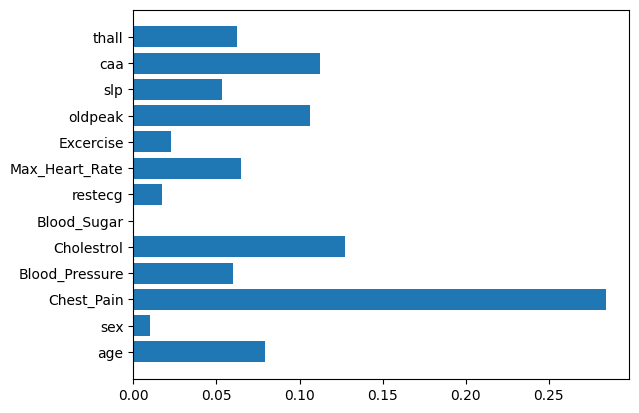

In [43]:
plt.barh(y = dt.feature_names_in_ , width=dt.feature_importances_)
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)
y_pred

In [ ]:
accuracy_score(y_test , y_pred)

In [ ]:
df = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)
y_pred

In [ ]:
accuracy_score(y_test , y_pred)

In [ ]:
from sklearn import tree

In [ ]:
tree.plot_tree(dt)
plt.show()

In [ ]:
plt.barh(y= dt.feature_names_in_ , width=dt.feature_importances_)
plt.show()